![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Quick Flux Processing Chain
</b>
</span>

---
**Notebook version**: `2` (26 Nov 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

# Description

- quick (simplified) version of the flux processing chain
- uses a lot of default values, which means not a lot of user input is needed
- recommended to quickly check on current data
- produces data up to Level-3.3 (USTAR filtering for NEE)
- for more info about flux levels see [Flux Processing Chain](https://www.swissfluxnet.ethz.ch/index.php/data/ecosystem-fluxes/flux-processing-chain/)

# Settings

In [1]:
FLUXVARS = ['FC', 'LE', 'H']  # Name of the flux variable in fluxnet output files: FC, FH2O, LE, ET, H, FN2O, FCH4; must be given as list even if there is only one variable
SOURCEDIRS = [r'L:\Sync\luhk_work\TMP\HON']  # Folders where the EddyPro output files are located
SITE_LAT = 47.41887   # Latitude of site
SITE_LON = 8.491318  # Longitude of site
FILETYPE = 'EDDYPRO-FLUXNET-CSV-30MIN'  # Filetype of EddyPro output files, can be 'EDDYPRO-FLUXNET-CSV-30MIN' or 'EDDYPRO-FULL-OUTPUT-CSV-30MIN'
UTC_OFFSET = 1  # Time stamp offset in relation to UTC, e.g. 1 for UTC+01:00 (CET), important for the calculation of potential radiation for detecting daytime and nighttime
NIGHTTIME_THRESHOLD = 20  # Threshold for potential radiation in W m-2, conditions below threshold are nighttime
DAYTIME_ACCEPT_QCF_BELOW = 2
NIGHTTIMETIME_ACCEPT_QCF_BELOW = 2

# Imports

In [2]:
import importlib.metadata
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from diive.pkgs.fluxprocessingchain.fluxprocessingchain import QuickFluxProcessingChain
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.0


# Run

Found 188 files with extension *.csv and file IDs ['eddypro_', '_fluxnet_']:
 Found file #1: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240422-234138_fluxnet_2024-04-22T234140_adv.csv
 Found file #2: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240513-134414_fluxnet_2024-05-13T134439_adv.csv
 Found file #3: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240524-163858_fluxnet_2024-05-24T163954_adv.csv
 Found file #4: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240526-093948_fluxnet_2024-05-26T093958_adv.csv
 Found file #5: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240528-090003_fluxnet_2024-05-28T090018_adv.csv
 Found file #6: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240529-090003_fluxnet_2024-05-29T090016_adv.csv
 Found file #7: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240530-090002_fluxnet_2024-05-30T090014_adv.csv
 Found file #8: L:\Sync\luhk_work\TMP\HON\eddypro_CH-HON_FR-20240531-090003_fluxnet_2024-05-31T090017_adv.csv
 Found file #9: L:\Sync\luhk_work\TMP\HON\e

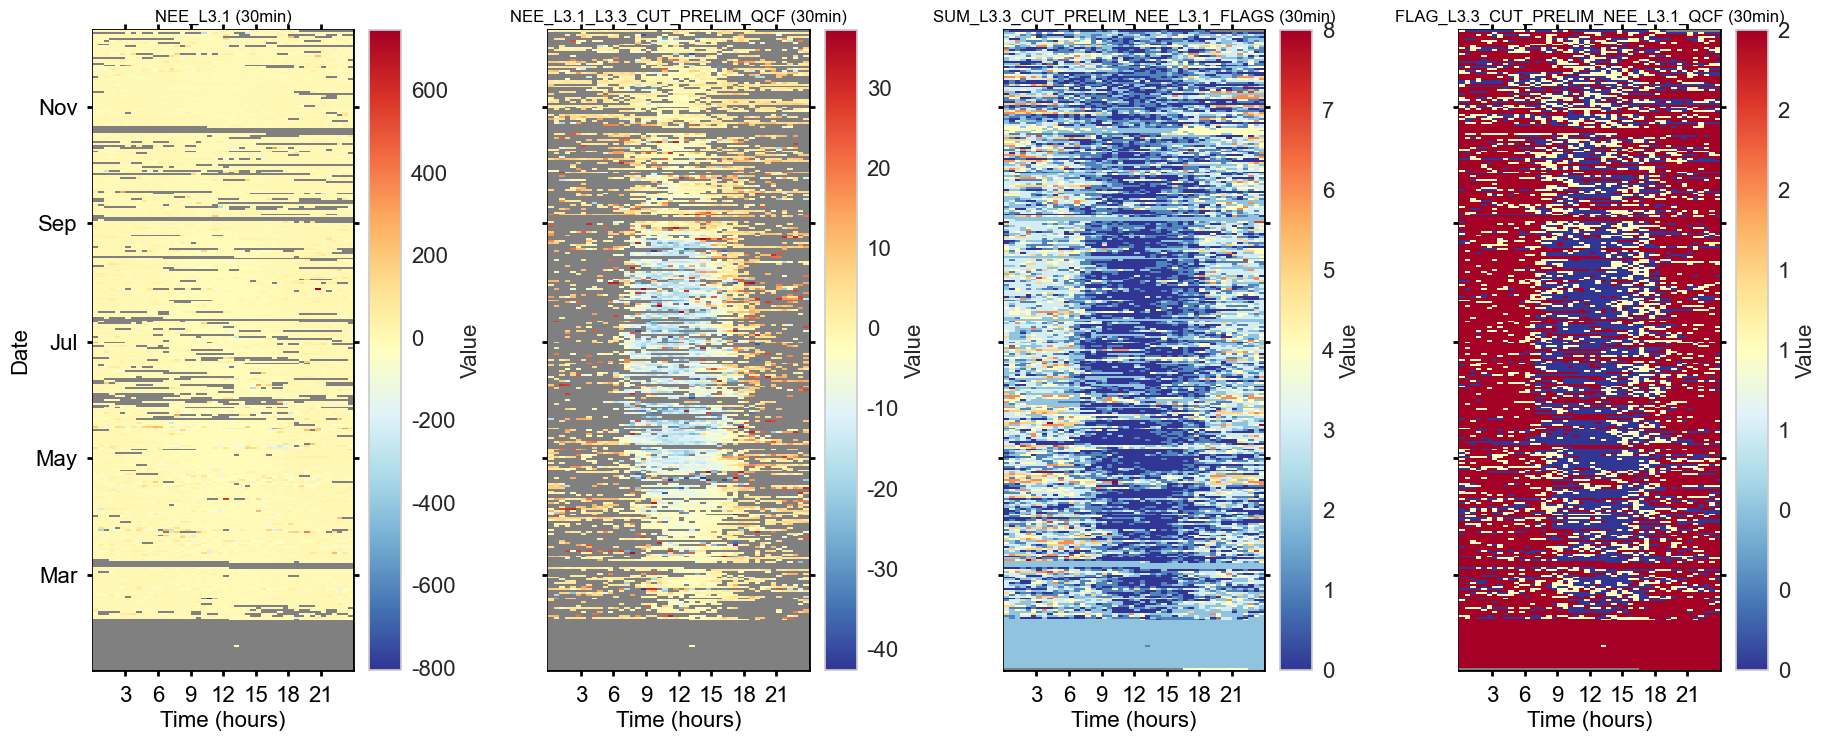

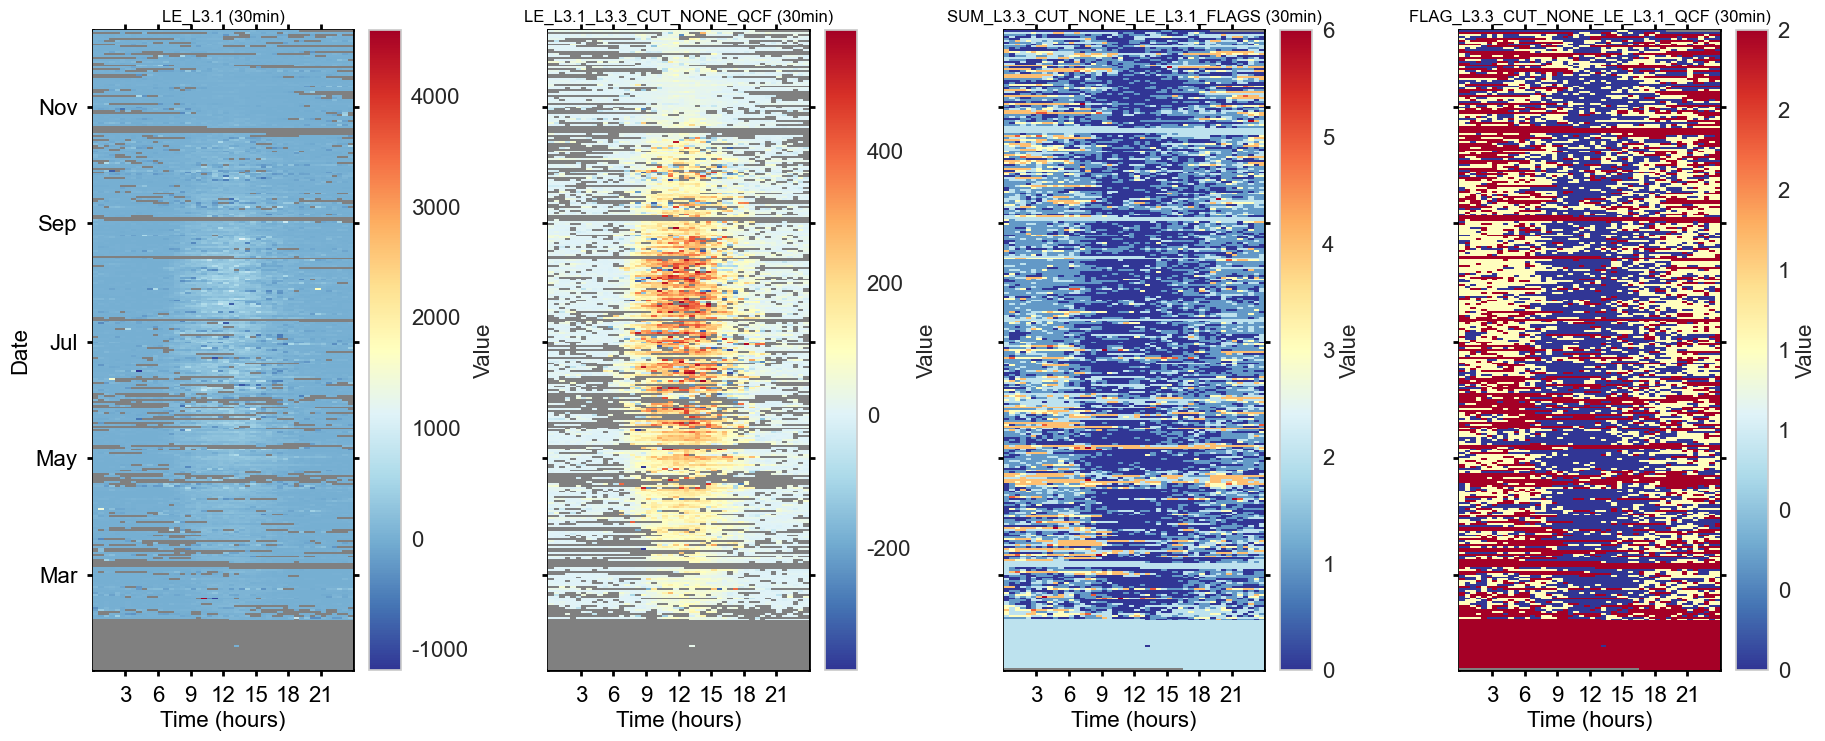

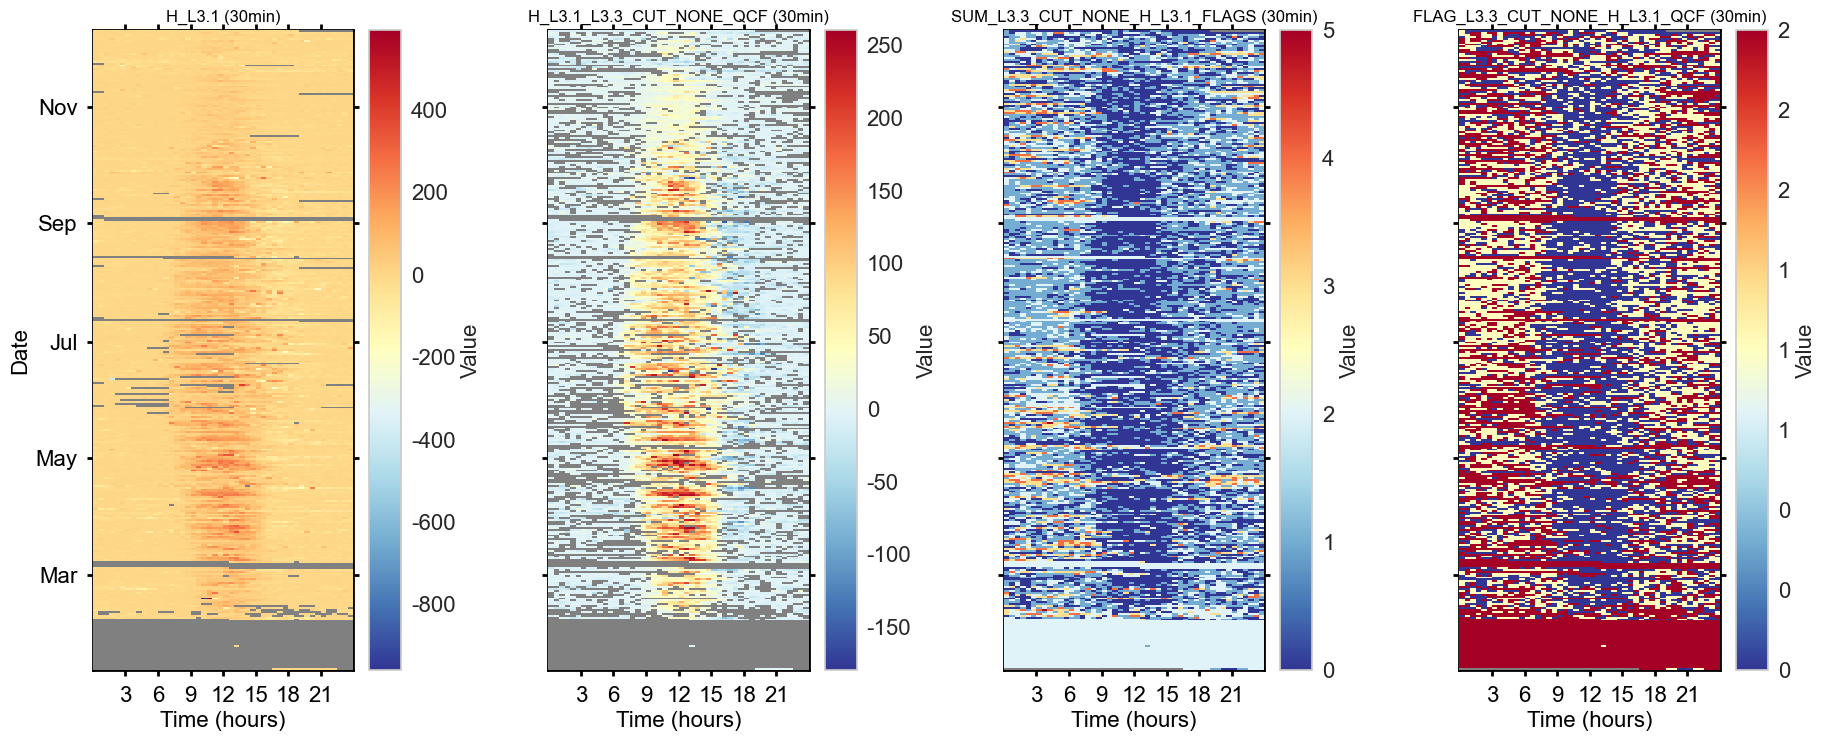

In [3]:
qfpc = QuickFluxProcessingChain(
    fluxvars=FLUXVARS,
    sourcedirs=SOURCEDIRS,
    site_lat=SITE_LAT,
    site_lon=SITE_LON,
    utc_offset=UTC_OFFSET,
    nighttime_threshold=NIGHTTIME_THRESHOLD,
    daytime_accept_qcf_below=DAYTIME_ACCEPT_QCF_BELOW,
    nighttimetime_accept_qcf_below=NIGHTTIMETIME_ACCEPT_QCF_BELOW,
    test_signal_strength=True,
    test_signal_strength_col='CUSTOM_AGC_MEAN',
    test_signal_strength_method='discard above',
    test_signal_strength_threshold=90
)

</br>

In [4]:
quickresults_df =  qfpc.fpc.fpc_df
quickresults_df.head()

,H,USTAR,SW_IN_POT,DAYTIME,NIGHTTIME,FLAG_L2_H_MISSING_TEST,...,SUM_L3.3_CUT_NONE_H_L3.1_HARDFLAGS,SUM_L3.3_CUT_NONE_H_L3.1_SOFTFLAGS,SUM_L3.3_CUT_NONE_H_L3.1_FLAGS,FLAG_L3.3_CUT_NONE_H_L3.1_QCF,H_L3.1_L3.3_CUT_NONE_QCF,H_L3.1_L3.3_CUT_NONE_QCF0
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2024-01-11 16:45:00,-0.233684,0.011144,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,2.0,NaN,NaN
2024-01-11 17:15:00,0.202995,0.011979,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,2.0,NaN,NaN
2024-01-11 17:45:00,-0.008013,0.008932,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,2.0,NaN,NaN
2024-01-11 18:15:00,-0.003405,0.004968,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,2.0,NaN,NaN
2024-01-11 18:45:00,0.269706,0.005618,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,2.0,NaN,NaN


</br>

# **End of notebook**
Congratulations, you reached the end of this notebook! Before you go let's store your finish time.

In [5]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2024-12-11 13:59:55
